# Milestone 2: Practicing Satellite Data Analysis with PolarWatch Data

> Author: Tien Ly  
> Created: June 2024

## Objective
As part of milestone 2 of my internship with NOAA PolarWatch, this Jupyter notebook showcases the visualization techniques I learned from satellite data tutorials by applying them to datasets from PolarWatch. The notebook is divided into 2 parts:

1. **Time Series Analysis of Sea Ice Concentration in the Arctic (2023):** This section presents an analysis of the monthly mean sea ice concentration (SIC) for 2023 using the NOAA/NSIDC Climate Data Record V4 dataset. The aim is to visualize and interpret the temporal variations in SIC.

2. **Mapping Satellite Sea Ice Concentration and In Situ Sea Surface Temperature (September 2023):** This section focuses on integrating satellite-derived polar stereographic SIC data with geographically referenced in situ sea surface temperature (SST) measurements from the International Arctic Buoy Programme. The goal is to create comprehensive maps that combine these datasets, providing a spatial understanding of sea ice and SST distribution in the Arctic for September 2023.

### Dataset used
Sea Ice Concentration, NOAA/NSIDC Climate Data Record V4, Northern Hemisphere, 25km, Science Quality, 1978-Present, Monthly  
https://polarwatch.noaa.gov/erddap/griddap/nsidcG02202v4nhmday.graph

International Arctic Buoy Programme meteorological and oceanographic buoys  
https://polarwatch.noaa.gov/erddap/tabledap/iabpv2_buoys.html


## Import libraries

In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## Part 1: Time Series Analysis of Sea Ice Concentration in the Arctic (2023)

### Get the SIC data from ERDDAP

In [3]:
# Open the dataset in xarray
url = 'https://polarwatch.noaa.gov/erddap/griddap/nsidcG02202v4nhmday'
ds = xr.open_dataset(url)
ds

/Users/tienly/opt/miniconda3/envs/polarwatch/lib/python3.9/site-packages/xarray/conventions.py:286: SerializationWarning: variable 'melt_onset_day_cdr_seaice_conc_monthly' has multiple fill values {-1, 255} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 2GB
Dimensions:                                 (time: 545, ygrid: 448, xgrid: 304)
Coordinates:
  * time                                    (time) datetime64[ns] 4kB 1978-11...
  * ygrid                                   (ygrid) float32 2kB 5.838e+06 ......
  * xgrid                                   (xgrid) float32 1kB -3.838e+06 .....
Data variables:
    cdr_seaice_conc_monthly                 (time, ygrid, xgrid) float32 297MB ...
    melt_onset_day_cdr_seaice_conc_monthly  (time, ygrid, xgrid) float32 297MB ...
    nsidc_bt_seaice_conc_monthly            (time, ygrid, xgrid) float32 297MB ...
    nsidc_nt_seaice_conc_monthly            (time, ygrid, xgrid) float32 297MB ...
    qa_of_cdr_seaice_conc_monthly           (time, ygrid, xgrid) float32 297MB ...
    stdev_of_cdr_seaice_conc_monthly        (time, ygrid, xgrid) float32 297MB ...
Attributes: (12/66)
    _NCProperties:                                       version=2,netcdf=4.8...
    acknowledgement:                                     This project was sup...
    cdm_data_type:                                       Grid
    cdr_variable:                                        cdr_seaice_conc_monthly
    comment:                                             The variable melt_on...
    contributor_name:                                    Walter N. Meier, Flo...
    ...                                                  ...
    summary:                                             This data set provid...
    time_coverage_duration:                              P1M
    time_coverage_end:                                   2024-03-01T00:00:00Z
    time_coverage_resolution:                            P1M
    time_coverage_start:                                 1978-11-01T00:00:00Z
    title:                                               Sea Ice Concentratio...

In [4]:
# Extract the SIC data from the dataset
seaice_da = ds['cdr_seaice_conc_monthly']
seaice_da

<xarray.DataArray 'cdr_seaice_conc_monthly' (time: 545, ygrid: 448, xgrid: 304)> Size: 297MB
[74224640 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 4kB 1978-11-01 1978-12-01 ... 2024-03-01
  * ygrid    (ygrid) float32 2kB 5.838e+06 5.812e+06 ... -5.312e+06 -5.338e+06
  * xgrid    (xgrid) float32 1kB -3.838e+06 -3.812e+06 ... 3.712e+06 3.738e+06
Attributes: (12/13)
    ancillary_variables:  stdev_of_cdr_seaice_conc_monthly qa_of_cdr_seaice_c...
    colorBarMaximum:      1.0
    colorBarMinimum:      0.0
    colorBarPalette:      KT_ice
    datum:                +ellps=urn:ogc:def:crs:EPSG::4326
    flag_meanings:        pole_hole lakes coastal land_mask missing_data
    ...                   ...
    ioos_category:        Ice Distribution
    long_name:            NOAA/NSIDC Climate Data Record of Passive Microwave...
    references:           https://nsidc.org/data/g02202/versions/4/
    standard_name:        sea_ice_area_fraction
    units:                1
    valid_range:          [0. 1.]

**Note:** The sea ice concentration values range from 0 (no ice cover) to 1 (100% ice cover). However, this dataset also includes values above 1 to flag features like lakes, coastline, and land. Therefore, we need to remove those flag values.

In [5]:
# Remove flag values (value > 1)
seaice_da = seaice_da.where(seaice_da <= 1)
seaice_da

<xarray.DataArray 'cdr_seaice_conc_monthly' (time: 545, ygrid: 448, xgrid: 304)> Size: 297MB
array([[[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1978-11-01 1978-12-01 ... 2024-03-01
  * ygrid    (ygrid) float32 2kB 5.838e+06 5.812e+06 ... -5.312e+06 -5.338e+06
  * xgrid    (xgrid) float32 1kB -3.838e+06 -3.812e+06 ... 3.712e+06 3.738e+06
Attributes: (12/13)
    ancillary_variables:  stdev_of_cdr_seaice_conc_monthly qa_of_cdr_seaice_c...
    colorBarMaximum:      1.0
    colorBarMinimum:      0.0
    colorBarPalette:      KT_ice
    datum:                +ellps=urn:ogc:def:crs:EPSG::4326
    flag_meanings:        pole_hole lakes coastal land_mask missing_data
    ...                   ...
    ioos_category:        Ice Distribution
    long_name:            NOAA/NSIDC Climate Data Record of Passive Microwave...
    references:           https://nsidc.org/data/g02202/versions/4/
    standard_name:        sea_ice_area_fraction
    units:                1
    valid_range:          [0. 1.]

#### Print out some useful metadata

In [6]:
print('Dimensions:', list(seaice_da.dims))
print('Coordinates:', list(seaice_da.coords))

Dimensions: ['time', 'ygrid', 'xgrid']
Coordinates: ['time', 'ygrid', 'xgrid']


In [7]:
print('Earliest date =', seaice_da.time.values[0])
print('Most recent date =', seaice_da.time.values[-1])

Earliest date = 1978-11-01T00:00:00.000000000
Most recent date = 2024-03-01T00:00:00.000000000


In [8]:
print("Is xgrid's first value -->", round(seaice_da.xgrid[0].item(), 6))
print('greater than') 
print("xgrid's last value -->", round(seaice_da.xgrid[-1].item(), 6))

print(seaice_da.xgrid[0].item() > seaice_da.xgrid[-1].item())

Is xgrid's first value --> -3837500.0
greater than
xgrid's last value --> 3737500.0
False


In [9]:
print("Is ygrid's first value -->", round(seaice_da.ygrid[0].item(), 6))
print('greater than') 
print("ygrid's last value -->", round(seaice_da.ygrid[-1].item(), 6))

print(seaice_da.ygrid[0].item() > seaice_da.ygrid[-1].item())

Is ygrid's first value --> 5837500.0
greater than
ygrid's last value --> -5337500.0
True


### Plot a time series with 12 months of data

In [10]:
# Select data within 2023
start_date = '2023-01-01'
end_date = '2023-12-01'
seaice_ts = seaice_da.sel(time=slice(start_date, end_date))
seaice_ts

<xarray.DataArray 'cdr_seaice_conc_monthly' (time: 12, ygrid: 448, xgrid: 304)> Size: 7MB
array([[[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        [ 0.,  0.,  0., ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 96B 2023-01-01 2023-02-01 ... 2023-12-01
  * ygrid    (ygrid) float32 2kB 5.838e+06 5.812e+06 ... -5.312e+06 -5.338e+06
  * xgrid    (xgrid) float32 1kB -3.838e+06 -3.812e+06 ... 3.712e+06 3.738e+06
Attributes: (12/13)
    ancillary_variables:  stdev_of_cdr_seaice_conc_monthly qa_of_cdr_seaice_c...
    colorBarMaximum:      1.0
    colorBarMinimum:      0.0
    colorBarPalette:      KT_ice
    datum:                +ellps=urn:ogc:def:crs:EPSG::4326
    flag_meanings:        pole_hole lakes coastal land_mask missing_data
    ...                   ...
    ioos_category:        Ice Distribution
    long_name:            NOAA/NSIDC Climate Data Record of Passive Microwave...
    references:           https://nsidc.org/data/g02202/versions/4/
    standard_name:        sea_ice_area_fraction
    units:                1
    valid_range:          [0. 1.]

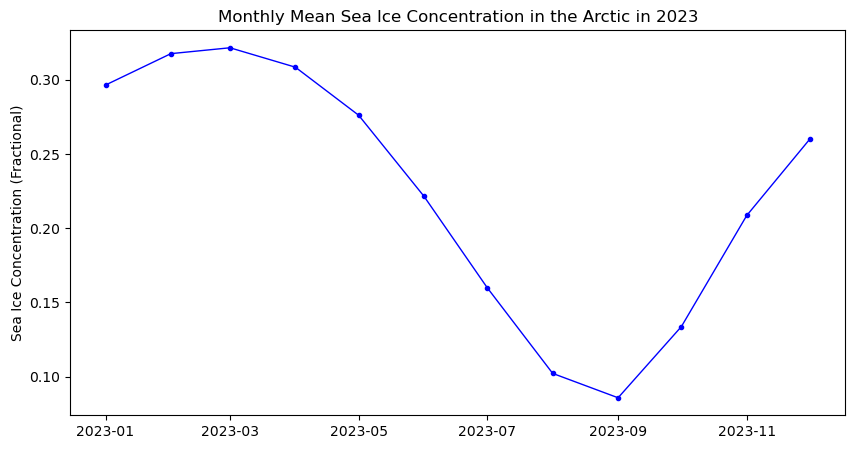

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

# Calculate the spatial mean for each time step
seaice_monthly_mean = seaice_ts.mean(dim=['ygrid', 'xgrid'])

# Plot the data
ax.plot(seaice_monthly_mean.time, seaice_monthly_mean,
        'o', markersize=3, c='blue',
        linestyle='-', linewidth=1)

# Add a title and labels
ax.set_title('Monthly Mean Sea Ice Concentration in the Arctic in 2023')
ax.set_ylabel('Sea Ice Concentration (Fractional)')

# Show the plot
plt.show()

## Part 2: Mapping Satellite Sea Ice Concentration and In Situ Sea Surface Temperature in the Arctic (September 2023)

### Map SIC on a projected map

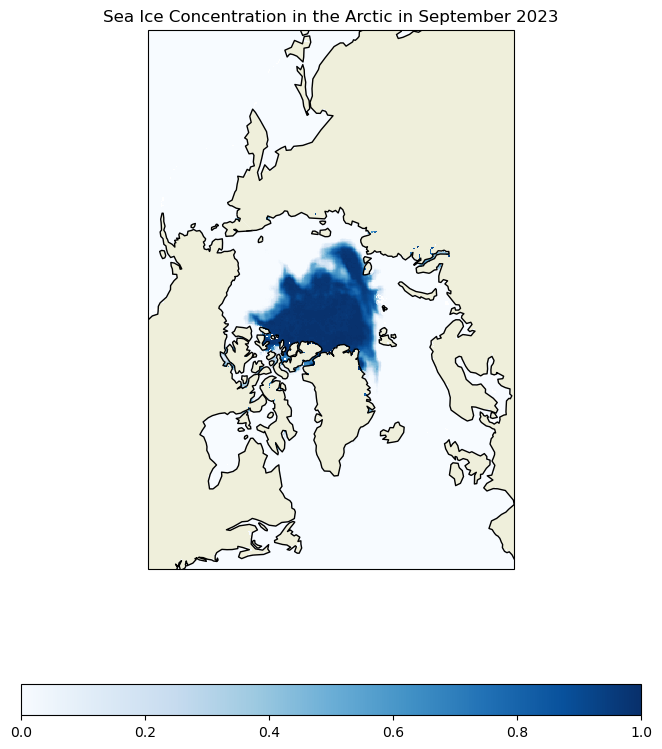

In [19]:
# Set the data projection using EPSG Code 
data_crs = ccrs.epsg('3411')
# Set the mapping projection to cartopy's North Polar Stereographic
crs_epsg = ccrs.NorthPolarStereo(central_longitude=-45)

# Set the map projection and associated boundaries
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=crs_epsg)
ax.set_extent([-3850000.0, 3750000.0, -5350000, 5850000.0], crs_epsg)
ax.add_feature(cfeature.LAND)
ax.coastlines()

# Map the September 2023 data
cs = ax.pcolormesh(seaice_da.xgrid, seaice_da.ygrid, seaice_da.sel(time=slice('2023-09-01', '2023-09-01')).squeeze(), 
                   cmap=plt.cm.Blues, transform=data_crs) # transform = which projection data (coords) were defined 
# Add a colorbar
fig.colorbar(cs, ax=ax, location='bottom', shrink=0.8)

# Add a title and show the plot
ax.set_title('Sea Ice Concentration in the Arctic in September 2023')
plt.show()

### Map SST (non-projected data) on a projected map
I manually downloaded the SST data in CSV format from the PolarWatch website, which contains daily measurements for September 2023.

In [13]:
# Read the SST data into a pandas dataframe
df = pd.read_csv('surface_temp.csv')[1:].reset_index(drop=True) # drop the first row
df = df.astype({'surface_temp': 'float', 'latitude': 'float', 'longitude': 'float'})
df

,surface_temp,latitude,longitude
0,15.2,53.1940,-25.5016
1,15.2,53.1940,-25.5016
2,15.2,53.1940,-25.5016
3,15.2,53.2260,-25.4410
4,15.2,53.2260,-25.4410
...,...,...,...
251131,37.8,78.7782,125.2904
251132,38.0,78.7748,125.2956
251133,37.2,78.7714,125.3000
251134,37.8,78.7682,125.3042


In [14]:
# Examine the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251136 entries, 0 to 251135
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   surface_temp  191239 non-null  float64
 1   latitude      251136 non-null  float64
 2   longitude     251136 non-null  float64
dtypes: float64(3)
memory usage: 5.7 MB


In [15]:
# Remove the null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191239 entries, 0 to 251135
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   surface_temp  191239 non-null  float64
 1   latitude      191239 non-null  float64
 2   longitude     191239 non-null  float64
dtypes: float64(3)
memory usage: 5.8 MB


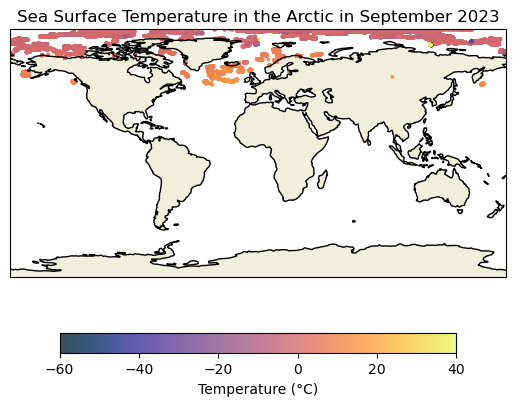

In [16]:
# Set the basemap to cartopy's PlateCarree() projection
fig = plt.figure() 
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.coastlines()
ax.set_global()
ax.add_feature(cfeature.LAND)

# Set the data crs 
plt.scatter(y=df['latitude'], x=df['longitude'], c=df['surface_temp'],
            s=3, alpha=0.8, cmap=cmocean.cm.thermal, transform=ccrs.PlateCarree())

plt.colorbar(location='bottom', shrink=0.8, label='Temperature (°C)')
ax.set_title('Sea Surface Temperature in the Arctic in September 2023')
plt.show()

### Map SIC and SST together

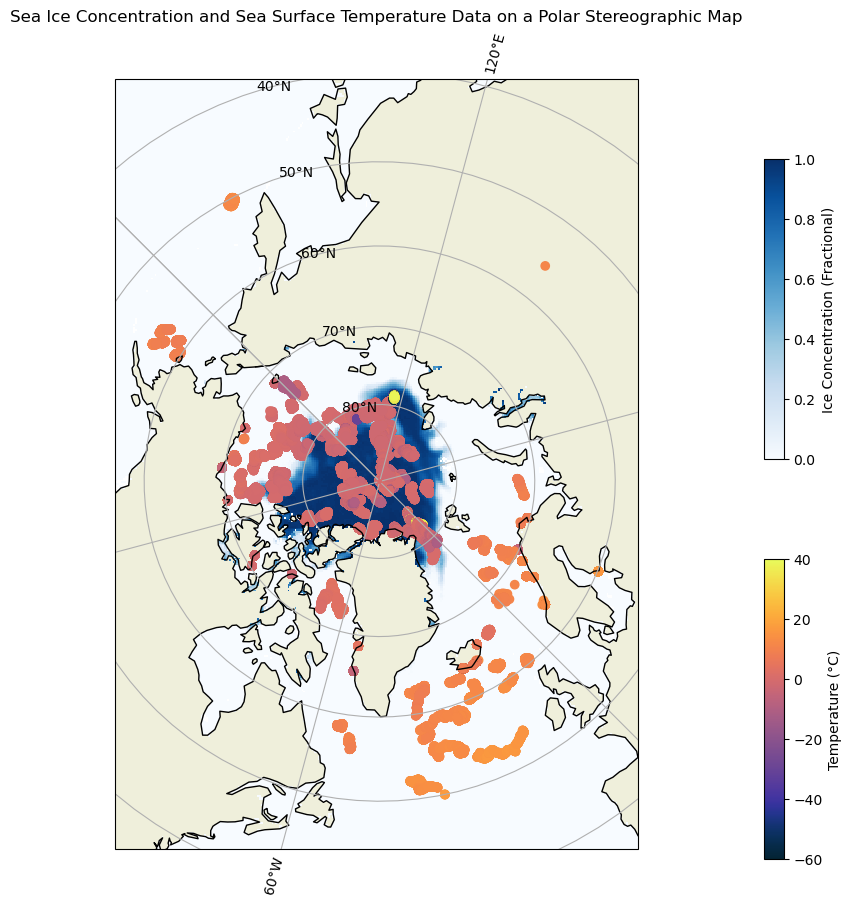

In [20]:
# Set up the figure
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=crs_epsg)
ax.add_feature(cfeature.LAND)
ax.coastlines()
ax.set_extent([-3850000.0, 3750000.0, -5350000.0, 5850000.0], crs_epsg )
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=True)

# Plot SIC
cs = ax.pcolormesh(seaice_da.xgrid, seaice_da.ygrid,
                   seaice_da.sel(time=slice('2023-09-01', '2023-09-01')).squeeze(), 
                   cmap=plt.cm.Blues, transform=data_crs)

# Plot SST
scatter = ax.scatter(y=df['latitude'], x=df['longitude'], c=df['surface_temp'],
                     cmap=cmocean.cm.thermal, alpha=1, transform=ccrs.PlateCarree())

# Create separate axes for colorbars
cbar_ax1 = fig.add_axes([0.9, 0.5, 0.02, 0.3]) # [left, bottom, width, height]
cbar_ax2 = fig.add_axes([0.9, 0.1, 0.02, 0.3])

# Add colorbars
cbar1 = fig.colorbar(cs, cax=cbar_ax1)
cbar1.set_label('Ice Concentration (Fractional)')

cbar2 = fig.colorbar(scatter, cax=cbar_ax2)
cbar2.set_label('Temperature (°C)')

ax.set_title('Sea Ice Concentration and Sea Surface Temperature Data on a Polar Stereographic Map')
plt.show()